In [5]:
import pandas as pd , matplotlib.pyplot as plt ,seaborn as sns , numpy as np 

In [6]:
shipdata=pd.read_csv('train.csv')

In [7]:
shipdata.head()


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


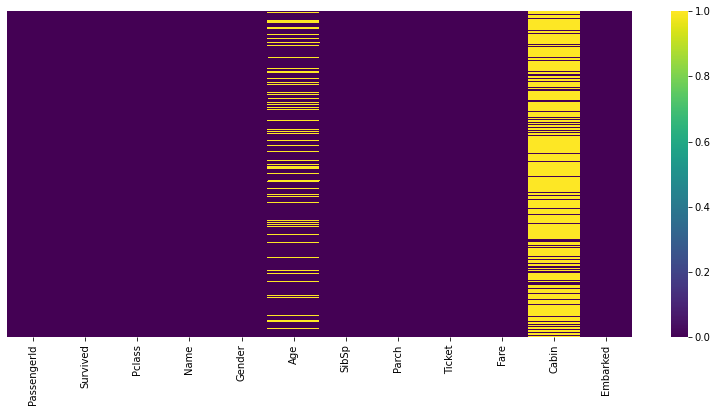

In [9]:
#null values
plt.figure(figsize=(14,6))
sns.heatmap(shipdata.isnull(),yticklabels=False,cmap='viridis')


In [15]:
#define gettitle in name 
def getTitle(name):
    if "." not in name:
        return("No Title")
    else:
        return(name.split(",")[1].split(".")[0].strip())

In [17]:
shipdata['Title']=shipdata.Name.apply(getTitle)

In [19]:
shipdata.groupby('Title').Age.agg(['mean','median','count'])

,mean,median,count
Title,,,
Capt,70.000000,70.0,1
Col,58.000000,58.0,2
Don,40.000000,40.0,1
Dr,42.000000,46.5,6
Jonkheer,38.000000,38.0,1
Lady,48.000000,48.0,1
Major,48.500000,48.5,2
Master,4.574167,3.5,36
Miss,21.773973,21.0,146


In [20]:
shipdata.groupby('Title')['Age'].apply(lambda x:x.fillna(x.median()))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

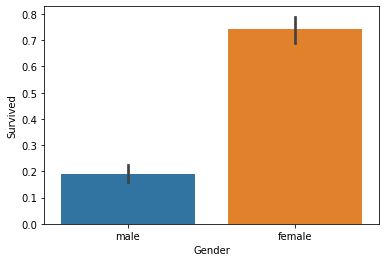

In [21]:
#gender 
sns.barplot(x='Gender',y='Survived',data=shipdata)

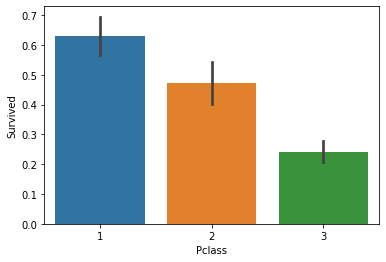

In [22]:
#passenger class 
sns.barplot(x='Pclass',y='Survived',data=shipdata)

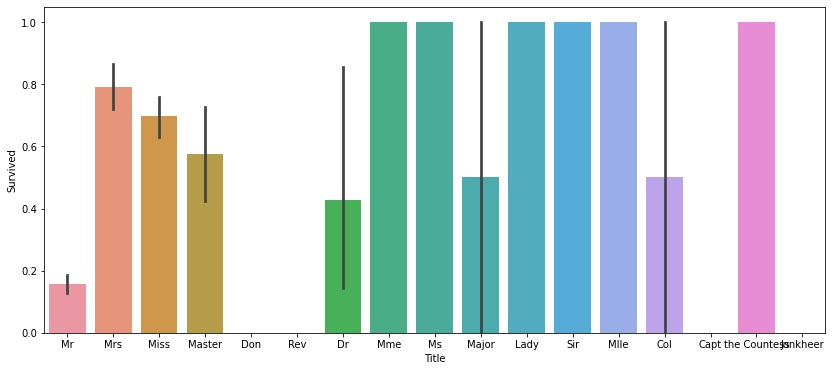

In [24]:
#impact of title 
plt.figure(figsize=(14,6))
sns.barplot(x='Title',y='Survived',data=shipdata)

In [28]:
#dropping cabin coz it has lot of missing values 
shipdata.drop(columns=['Cabin','PassengerId','Name','Ticket'])

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


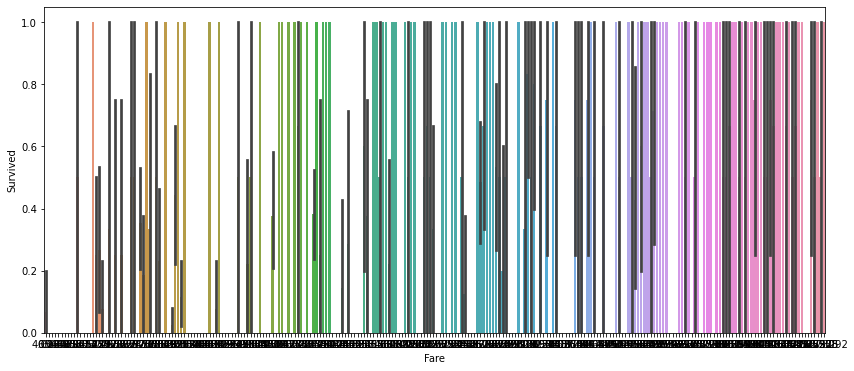

In [26]:
df.dropna